# II: Percolation of defects
This notebook contains all the useful computations to make Figures in the 
supplementary informations 

In [1]:
%matplotlib inline
#
from lrgsglib.core import *
from lrgsglib.funcs import create_Lattice2D_WeigvV
from lrgsglib.config.plotlib import ListedColormap
from scipy.optimize import curve_fit
#
move_to_rootf()
plt.style.use("ipynb/nb_plotsheet.mplstyle")
#
subDatPth = os.path.join('plot', 'paper', 'suppinf', '')
datPth = os.path.join('data', subDatPth)
subPthStr = ['anderson_localization', 'defects_plots']
datPthDict = {s: os.path.join(datPth, s, '') for s in subPthStr}
for path in datPthDict.values(): os.makedirs(path, exist_ok=True)

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


### Anderson localization

In [ ]:
pflip = 0.15
side1 = 64

In [ ]:
l = Lattice2D(side1, pflip=pflip, seed=363)
l.flip_sel_edges(l.fleset['G'])
l.compute_k_eigvV()

In [ ]:
arr = l.eigV[0].reshape(*l.syshape)
compound_log_array = np.log(np.abs(arr))
compound_log_array2 = np.where(arr > 0, np.log(arr), np.nan)

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(40, 10))
#
kwim = dict(pad=0.1)
#
im = ax1.imshow(arr)
ax1.set_title(r"$|\lambda_0\rangle$")
imshow_colorbar_caxdivider(im, ax1, **kwim)
im = ax2.imshow(compound_log_array)
ax2.set_title(r"$\log(\abs{|\lambda_0\rangle})$")
imshow_colorbar_caxdivider(im, ax2, **kwim)
im = ax3.imshow(compound_log_array2)
ax3.set_title(r"$\log(|\lambda_0^+\rangle)$")
imshow_colorbar_caxdivider(im, ax3, **kwim)
im = ax4.imshow(l.bin_eigV().reshape(*l.syshape))
ax4.set_title(r"$\mathrm{sign}(|\lambda_0\rangle)$")
imshow_colorbar_caxdivider(im, ax4, **kwim)
for ax in (ax1, ax2, ax3, ax4):
    ax.axis('off')
#
fig.savefig(os.path.join(datPthDict['anderson_localization'], 
                         f"p={pflip:.3g}_{l.seed}.pdf"), bbox_inches="tight")

### Single sinks

In [39]:
l = Lattice3D(100, init_nw_dict=True)
l.flip_sel_edges(l.nwDict['single']['G'])
l.compute_k_eigvV()

In [49]:
field = np.abs(l.eigV[0].reshape(*l.syshape))
cut = np.s_[l.dim[0]//2, :, l.dim[2]//2]
x_values = np.linspace(-l.dim[0]//2, l.dim[0]//2, num=l.dim[0])

/tmp/ipykernel_220404/2032318933.py:4: RuntimeWarning: invalid value encountered in log
  return a * np.log(np.abs(x)+c) + b


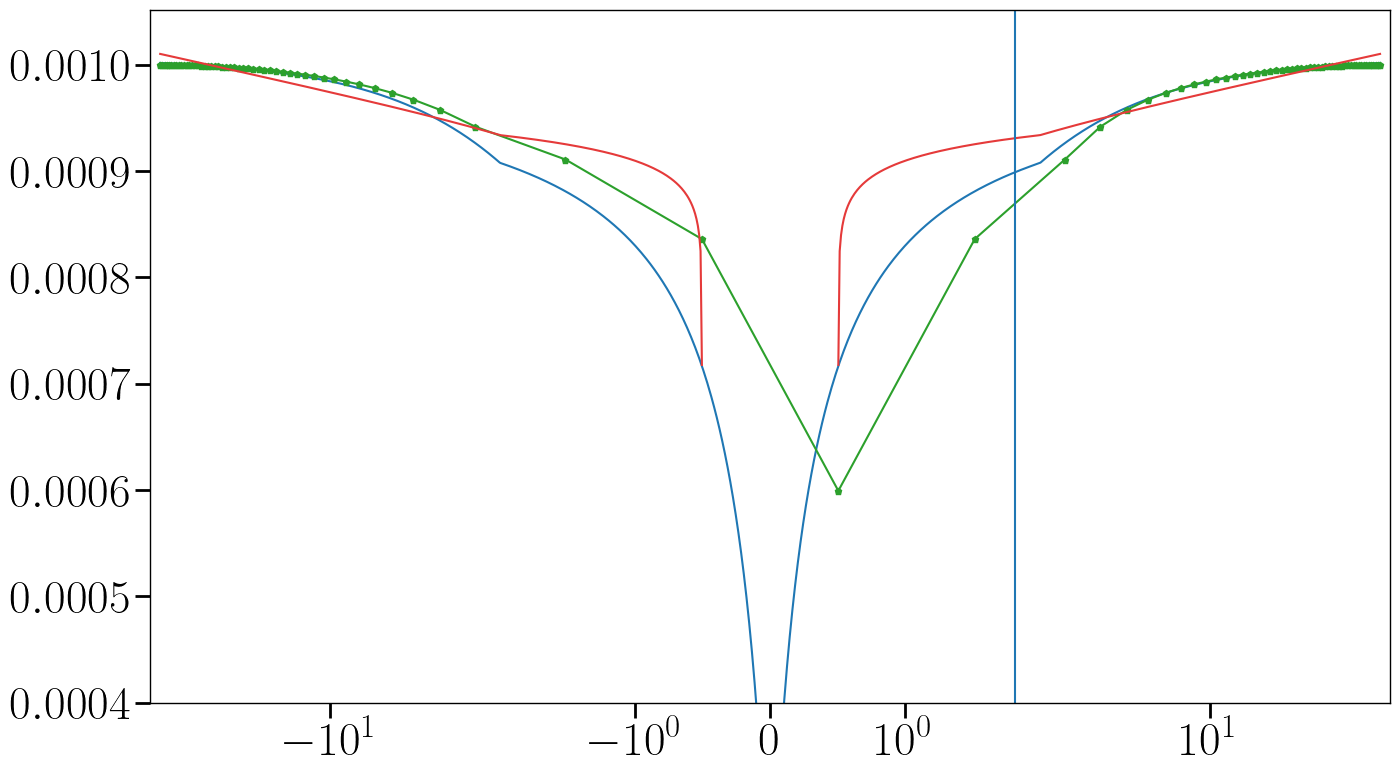

In [50]:
def model_1r(x, a, b, c):
    return a * (1 - 1/(np.abs(x)-c)) + b
def model_log(x, a, b, c):
    return a * np.log(np.abs(x)+c) + b
popt_log, pcov_log = curve_fit(model_1r, x_values, field[cut])
x_cont = np.linspace(np.min(x_values), np.max(x_values), num=10000)
fit_log = model_1r(x_cont, *popt_log)
plt.plot(x_cont, fit_log, ls='-', marker='')

plt.plot(x_values, field[cut])

popt_log, pcov_log = curve_fit(model_log, x_values, field[cut])
x_cont = np.linspace(np.min(x_values), np.max(x_values), num=10000)
fit_log = model_log(x_cont, *popt_log)
plt.plot(x_cont, fit_log, ls='-', marker='')
plt.axvline(1.81)

plt.ylim(bottom=0.0004)
plt.xscale('symlog')

In [45]:
np.power(3*0.3418/(4*np.pi*0.22), 1/3)

0.7184892193277799

In [ ]:
l = Lattice2D(200, init_nw_dict=True)
l.flip_sel_edges(l.nwDict['single']['G'])
l.compute_k_eigvV()

In [ ]:
l.get_central_edge(on_g='H')

In [ ]:
field = l.eigV[0].reshape(*l.syshape)
cut = np.s_[:,l.side1//2]
x_values = np.linspace(-l.side1//2, l.side1//2, num=l.side1)-1

In [ ]:
x = np.rint(x_values)
x = np.concatenate([x[x<0]+1, x[x>=0]])
fx = field[cut]
fx_s = fx/min(fx)
fx_ss = fx_s
fx_1r = 1-np.abs(1/x)
fx_log = np.log(np.abs(x))

In [ ]:
from scipy.special import i0  # Modified Bessel function of the first kind
# Define the fitting functions with the additional free parameter 'c'
def model_1r(x, a, b, c):
    return a * (1 - np.abs(c/x)) + b
def model_log(x, a, b, c):
    return a * np.log(np.abs(x)+c) + b
def model_Cio(r, A, beta, B):
    # For r <= R, use the Bessel function solution
    R=1.86
    C_in = lambda r: A * i0(beta * r)
    
    # For r > R, use the logarithmic solution
    C_out = lambda r: A * np.log(r) + B
    
    # Piecewise function
    return np.piecewise(r, [r <= R, r > R], [C_in, C_out])
# Perform the fit for fx_1r with the additional parameter 'c'
bring_on = 0
popt_log, pcov_log = curve_fit(model_log, x, fx_ss)
x_cont = np.linspace(np.min(x), np.max(x), num=10000)
fit_log = model_log(x_cont, *popt_log)
# Plot the original and fitted curves
#
plt.plot(x, fx_ss, 'o', label='fx_ss')
plt.plot(x_cont, fit_log, '-', label='Fit fx_log')
#
plt.axvline(-1.73)
plt.axvline(1.73)
#
plt.xscale('symlog')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming a 1D grid of size 200
size = 200
# Example 1D field 'phi' (this can be replaced by your actual data)
phi = fx_ss  # Example density field

# Fourier Transform of the 1D field 'phi'
phi_ft = np.fft.fft(phi)

# Shift zero-frequency component to the center
phi_ft_shifted = np.fft.fftshift(phi_ft)

# Upsampling factor
factor = 4  # Increase resolution by a factor of 4
n_new = size * factor
pad_size = (n_new - size) // 2

# Zero-pad in the frequency domain
phi_ft_padded = np.pad(phi_ft_shifted, (pad_size, pad_size), mode='constant')

# Shift back the zero-frequency component to the original place
phi_ft_padded_shifted = np.fft.ifftshift(phi_ft_padded)

# Inverse Fourier Transform to get the upsampled field in the spatial domain
phi_upsampled = np.fft.ifft(phi_ft_padded_shifted).real

# Define the new grid, but keep the same physical size [0, size]
x_new = np.linspace(-size//2, size//2, n_new)

# Plot the original and upsampled field
plt.figure(figsize=(12, 6))

popt_log, pcov_log = curve_fit(model_log, x, phi)
x_cont = np.linspace(np.min(x), np.max(x), num=10000)
fit_log = model_log(x_cont, *popt_log)

plt.subplot(1, 2, 1)
plt.plot(x, phi, label="Original", marker='o')
plt.plot(x_cont, fit_log, ls='-', marker='', label="Upsampled")
plt.xscale('symlog')

plt.grid(True)


xnewidx = x_new>=0
xnewfit = x_new[xnewidx]
popt_log, pcov_log = curve_fit(model_Cio, xnewfit, phi_upsampled[xnewidx])
x_cont = np.linspace(np.min(x_new), np.max(x_new), num=10000)
fit_log = model_Cio(xnewfit, *popt_log)

plt.subplot(1, 2, 2)
plt.plot(x_new+.4, phi_upsampled, label="Upsampled", marker='.')
plt.plot(xnewfit, fit_log, ls='-', marker='', label="Upsampled")
plt.xscale('symlog')
plt.grid(True)
plt.axvline(-1.86)
plt.axvline(1.86)


plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a 200x200 grid
size = 200
x = np.linspace(0, size, size)  # Original grid along x-axis
y = np.linspace(0, size, size)  # Original grid along y-axis
X, Y = np.meshgrid(x, y)

# Example density field 'phi' (this can be replaced by your actual data)
phi = field  # Example density field

# Fourier Transform of phi
phi_ft = np.fft.fft2(phi)

# Shift zero-frequency component to the center
phi_ft_shifted = np.fft.fftshift(phi_ft)

# New grid size after upsampling
factor = 4  # Upsampling factor
n_new = size * factor
pad_size = (n_new - size) // 2

# Zero-pad in the frequency domain
phi_ft_padded = np.pad(phi_ft_shifted, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')

# Shift back the zero-frequency component to the original place
phi_ft_padded_shifted = np.fft.ifftshift(phi_ft_padded)

# Inverse Fourier Transform to get the upsampled field in the spatial domain
phi_upsampled = np.fft.ifft2(phi_ft_padded_shifted).real

# Define the new grid, but keep the same physical size [0, size]
x_new = np.linspace(0, size, n_new)
y_new = np.linspace(0, size, n_new)
X_new, Y_new = np.meshgrid(x_new, y_new)

# Plot the original and upsampled field
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Field (200x200)")
plt.contourf(X, Y, phi, cmap='viridis')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title(f"Upsampled Field ({n_new}x{n_new})")
plt.contourf(X_new, Y_new, phi_upsampled, cmap='viridis')
plt.colorbar()

plt.show()

In [ ]:
phi[cut].max(), phi_upsampled[cut2].max()

In [ ]:
cut2 = np.s_[:, l.side1]
x_cont = np.linspace(np.min(x), np.max(x), num=len(phi_upsampled[cut2]))+.75
popt_log, pcov_log = curve_fit(model_log, x_cont, phi_upsampled[cut2])
fit_log = model_log(x_cont, *popt_log)
plt.plot(x_cont, phi_upsampled[cut2])
plt.plot(x, phi[cut]/10)
plt.plot(x_cont, fit_log, '-', label='Fit fx_log')

plt.xscale('symlog')

### Map to Continuum Percolation

In [ ]:
side = 200
geo = 'squared'
cell = 'randZERR'
#
randpList = [0.05, 0.10, 0.25]
#
cmap = ListedColormap([cred, cblu])
#
start_letter = 'a'  # Change this to start from a different letter
total_subplots = 3
alphabet = string.ascii_lowercase
start_index = alphabet.index(start_letter.lower())
labels = [fr"\textbf{{({alphabet[(start_index + i) % 26]})}}" 
          for i in range(total_subplots)]

In [ ]:
thezip = zip(randpList, labels)
for pflip, ll in thezip:
    l = create_Lattice2D_WeigvV(cell=cell, side1=side, geo='squared', 
                                pflip=pflip, pbc=False, 
                                init_nw_dict=True, with_positions=True)
    #
    fig, ax = plt.subplots(ncols=2)
    #
    ticks = [0, side-1]
    ticksl = [r'$1$', fr'${side}$']
    #
    arr = flip_to_positive_majority_adapted(l.bin_eigV().reshape(l.syshape))
    im = ax[0].imshow(np.rot90(arr), cmap=cmap, 
                        origin='upper', interpolation='none')
    #
    ax[0].set_xticks(ticks)
    ax[0].set_yticks(ticks)
    ax[0].set_xticklabels(ticksl)
    ax[0].set_yticklabels(ticksl)
    #
    divdr, caxm, cbar = imshow_colorbar_caxdivider(im, ax[0])
    cbar.set_ticks([])
    #
    (x_txt, y_txt) = -0.15, 1.05
    ax[0].text(x_txt, y_txt, ll,
                transform=ax[0].transAxes, fontsize=50, 
                ha='center', va='center'
    )
    #
    ax[1].set_aspect('equal')
    #
    kwargsNxDraw = dict(width=1, node_size=0)
    nx.draw(l.G, l.get_node_pos(), ax[1], 
            edge_color=l.get_edge_color(pec='none'), **kwargsNxDraw)
    radius = l.r_c
    circles = [tuple([i[0][0], i[0][1]+.5]) 
            if (i[0][1] == i[1][1] - 1) 
            else tuple([i[0][0]+.5, i[0][1]]) 
            for i in l.fleset['H']]
    nodeAll = set(circles)
    lCl = find_largest_cluster_circle2D(circles, radius)
    ndOther = nodeAll - set(lCl)
    for cc in nodeAll:
        circC = (cc[0], cc[1])
        col = 'k' if circC in ndOther else 'r'
        circle = plt.Circle(circC, radius, 
                            color=col, alpha=.25)
        ax[1].add_patch(circle)
    fname = f'suppli_DEF_{geo}_{side}_{pflip}_{cell}.png'
    # fig.tight_layout()
    # fig.savefig(os.path.join(datPthDict['defects_plots'], fname), 
    #     bbox_inches='tight', transparent=True, dpi=300)
    # plt.close('all')

In [ ]:
l = Lattice2D(50, geo='triangular', pflip=0.75)
l.flip_random_fract_edges()
l.compute_k_eigvV(howmany=20)

In [ ]:
plt.imshow(np.sign(l.eigV[9].reshape(*l.syshape)))
plt.colorbar()